# Intro to the problem

The steiner tree problem is a combinatorical optimization problem.

We are given a graph G(V,E) with marked nodes.

For those nodes we try to obtain the minimum weight spanning tree that visits them all.

By now, it seems like the problem is identical to TSP, however, in the steiner tree problem we CAN add some intermeidate points called Steiner Points.

Each of that points can lead directly to the desired node when there is disconnectivity with another desired node.

# Code simulation

## imports

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def plot(G):
    pos=nx.shell_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()

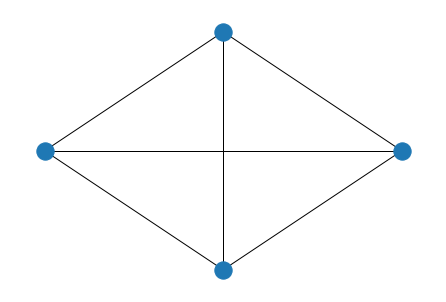

In [3]:
vertices = 4
K = nx.complete_graph(vertices)
for (u, v) in K.edges():
    K.edges[u,v]['weight'] = random.randint(0,1000)
nx.draw(K, nx.circular_layout(K))

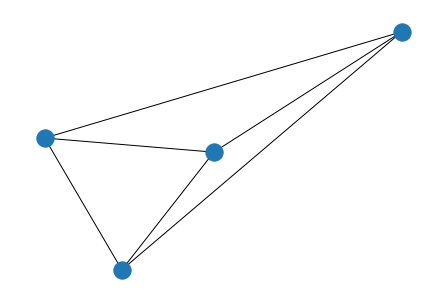

In [4]:
nx.draw(K, pos=nx.random_layout(K))

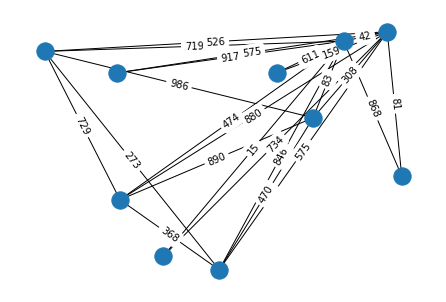

In [5]:
vertices = 10
K = nx.complete_graph(vertices)
for (u, v) in K.edges():
    K.edges[u,v]['weight'] = random.randint(0,1000)

lst = [(i, j) for i in range(1,5) for j in range(1,9)]
lst
K.remove_edges_from(lst)

pos=nx.random_layout(K)
nx.draw(K, pos=pos)
labels = nx.get_edge_attributes(K,'weight')
nx.draw_networkx_edge_labels(K,pos,edge_labels=labels)
plt.show()

## Construct the graph

Observe comple graph k10

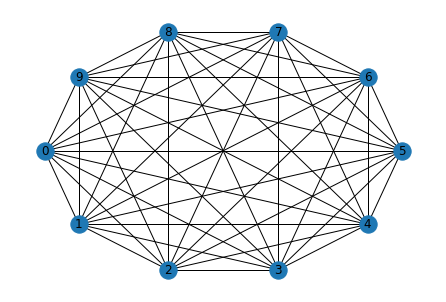

In [6]:
k10 = nx.complete_graph(10)
nx.draw(k10,pos=nx.shell_layout(k10), with_labels=True)

Now we construct subgraph G' with V, E' when E' is subset of E

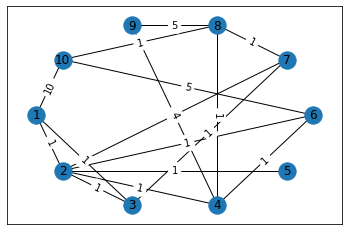

In [7]:
# init
G = nx.Graph()

# construct nodes
G.add_nodes_from(range(1,10))

# (u, v)
G.add_edges_from([(1,2), 
                  (1,3),
                  (1,10),
                  (2,4), 
                  (2,5), 
                  (2,6), 
                  (2,7), 
                  (2,3), 
                  (3,7), 
                  (4,6), 
                  (4,8), 
                  (4,9), 
                  (6,10), 
                  (7,8), 
                  (8,9), 
                  (8,10)])

# (u, v, w)
G.add_weighted_edges_from([(1,2,1), 
                           (1,3,1),
                           (1,10,10),
                           (2,4,1), 
                           (2,5,1), 
                           (2,6,1), 
                           (2,7,1), 
                           (2,3,1), 
                           (3,7,1), 
                           (4,6,1), 
                           (4,8,1), 
                           (4,9,4), 
                           (6,10,5), 
                           (7,8,1), 
                           (8,9,5), 
                           (8,10,1)])

plot(G)

Now we will pick terminal

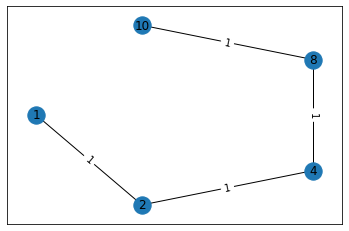

In [8]:
from networkx.algorithms.approximation import steiner_tree
terminals = [1, 10]
ST = steiner_tree(G, terminals)
plot(ST)

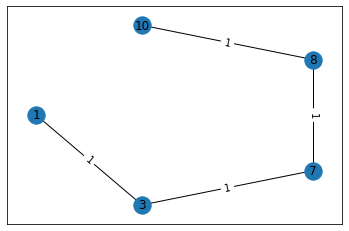

In [9]:
terminals = [1, 3, 10]
ST = steiner_tree(G, terminals)
plot(ST)

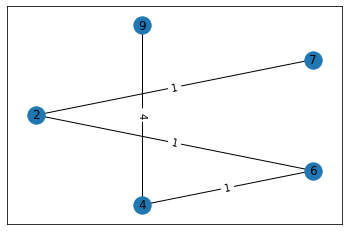

In [10]:
terminals = [6, 7, 9]
ST = steiner_tree(G, terminals)
plot(ST)

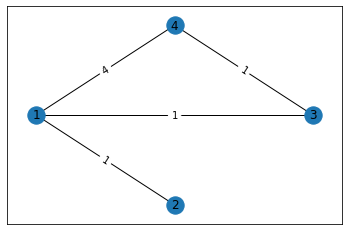

In [11]:
# init
G = nx.Graph()

# construct nodes
G.add_nodes_from(range(1,4))

# (u, v)
G.add_edges_from([(1,2), 
                  (1,3),
                  (1,4)])
# (ub, v, w)
G.add_weighted_edges_from([(1,2,1), 
                           (1,3,1),
                           (1,4,4),
                           (3,4,1)])

plot(G)

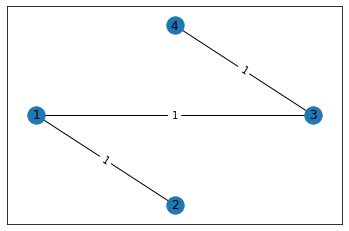

In [12]:
from networkx.algorithms.approximation import steiner_tree
terminals = [2, 4]
ST = steiner_tree(G, terminals)
plot(ST)